## 1. Introduction:

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. 

The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from **year 2000-2015 for 193 countries** for further analysis. The individual data files have been merged together into a single dataset.  The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.


![life Expectancy](What-is-the-life-expectancy-for-someone-with-dementia.png)

The aim of this report is to carry out predictive modelling of the Life Expectancy using the GHO data mentioned above on Jupyter Notebook IDE using R-programming language. This is an end-to-end Machine learning project where we explore and clean the data by handling the missing data and outliers. Secondly, standardisation of independent variables along with feature selection using Recursive Feature Elimination will be done. This is a regression problem where the dependent variable is Life Expectancy. Thirdly, cleaned data with relevant features are used to create three models: Multiple linear regression, Baseline Regression Tree and Extreme gradient boosting Trees. After comparison of performance metrics such as RMSE (Root mean squared error) and R Squared value, the best model is chosen and saved.

## 2. Dataset Description:

The independent variables in the dataset quality.csv are as follows: 
1. **Country (Nominal)** : Country from which the indicators are from.

2. **Year (Ordinal)** : Year from which the indicators are from.

3. **Status (Nominal)** : the status of the country "Developed" or "Developing".


4. **Adult.Mortality (Ratio)** : the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 250 then that means 250 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 25%

5. **infant_deaths (Ratio)** : number of infant deaths per 1000 population

6. **Alcohol (Ratio)** : a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

7. **percentage.expenditure (Ratio)** : expenditure on health as a percentage of Gross Domestic Product (gdp)

8. **Hepatitis.B (Ratio)** : number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

9. **Measles (Ratio)**: number of reported Measles cases per 1000 population

10. **BMI (Interval/Ordinal)** : average Body Mass Index (BMI) of a country's total population

11. **under.five.deaths (Ratio)** : number of people under the age of five deaths per 1000 population

12. **Polio (Ratio)**: number of 1 year olds with Polio immunization over the number of all 1 year olds in population

13. **Total_expenditure (Ratio)**: government expenditure on health as a percentage of total government expenditure

14. **Diphtheria (Ratio)** : Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

15. **HIV.AIDS (Ratio)** : deaths per 1000 live births caused by HIV/AIDS for people under 5 years of age

16. **GDP (Numeric)** : Gross Domestic Product per capita of a country

17. **Population (Numeric)** : population of a country

18. **thinness.1-19.years (Ratio)** : rate of thinness among people aged 10-19 (Note: this variable should be renamed to thinness_10-19_years)

19. **thinness.5-9.years (Ratio)** : rate of thinness among people aged 5-9

20. **income.composition.of.resources (Ratio)** : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

21. **Schooling (Ratio)** : average number of years of schooling of a population

Dependent Variable:

1. **Life.expectancy (Ratio)** : life expectancy of people in years for a particular country and year.


## 3. Methodology:


The Steps that we are going to follow to complete this implementation is as follows:

1. **Importing the necessary libraries**


2. **Data Loading**


3. **Exploratory Data Analysis**:
    1. Variable Transformation    
    2. Handling Missing Value:
    3. Outlier detection
    4. Exploring /insights from the data

4. Feature Engineering
    1. One hot Encoding (Status variable)
    2. Standardisation
    3. Extreme Gradient Boosting
      
5. **Modeling**
    1. Train Test Split
    2. Model creation - Training and testing
        1. Multiple Linear Regression
        2. Decision Tree (CART)
        3. Extreme Gradient boosting
    

6. **Results and Model Selection**

7. **Conclusion**

## 4. Performance Metrics Used

After implementing a machine learning algorithm, the next step is to find out how effective is the model based on metric and dataset. Two important performance metrics for regression problems are:
1. RMSE (Root Mean Square Error):

    Root Mean Square Error (RMSE) is the standard deviation the residuals (prediction errors).

    𝑹𝑴𝑺𝑬= √(𝑺𝑺𝑬/𝑵)

    1. Normalized by N, units of dependent variable.
    2. A good model should have a low RMSE value.
    
2. R2 Score (R-Squared):
   
   R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It may also be known as the coefficient of determination.
   
   R-squared values range from 0 to 1. The better the linear regression fits the data in comparison to the simple average, the closer the value of R2 is to 1.

## 5. Importing the necessary libraries

In [1]:
# for data manipulation
install.packages("tidyr")
library(tidyr)
install.packages("dplyr")
library(dplyr)
# for data visualisation
install.packages("ggplot2")
library(ggplot2)
install.packages("corrplot") 
library(corrplot)
# for modelling and feature engineering
install.packages("caret")
library(caret)
#for visualising decision trees
install.packages('rpart.plot') 
library(rpart.plot)
# for performance metrics
install.packages('Metrics') 
library(Metrics)

package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Divit\AppData\Local\Temp\RtmpmWsPnx\downloaded_packages


Warning message:
"package 'tidyr' was built under R version 3.6.3"

package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Divit\anaconda3\envs\r-env\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\Divit\anaconda3\envs\r-env\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"Warning message:
"restored 'dplyr'"


The downloaded binary packages are in
	C:\Users\Divit\AppData\Local\Temp\RtmpmWsPnx\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Divit\AppData\Local\Temp\RtmpmWsPnx\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Divit\AppData\Local\Temp\RtmpmWsPnx\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Divit\AppData\Local\Temp\RtmpmWsPnx\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice


package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Divit\AppData\Local\Temp\RtmpmWsPnx\downloaded_packages


Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Loading required package: rpart


package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Divit\AppData\Local\Temp\RtmpmWsPnx\downloaded_packages


Warning message:
"package 'Metrics' was built under R version 3.6.3"
Attaching package: 'Metrics'

The following objects are masked from 'package:caret':

    precision, recall



## 6. Data Loading

In [2]:
# loading the dataset
df_life <- read.csv("Life Expectancy Data.csv")

head(df_life)

Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [3]:
str(df_life)

'data.frame':	2938 obs. of  22 variables:
 $ Country                        : Factor w/ 193 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                           : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
 $ Status                         : Factor w/ 2 levels "Developed","Developing": 2 2 2 2 2 2 2 2 2 2 ...
 $ Life.expectancy                : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult.Mortality                : int  263 271 268 272 275 279 281 287 295 295 ...
 $ infant.deaths                  : int  62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ percentage.expenditure         : num  71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis.B                    : int  65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : int  1154 492 430 2787 3013 1989 2861 1599 1141 1990 ...
 $ BMI                            : num  19.1 18.6 18.1 17.6 17.2 16.7 16.

Shape: 2938 rows and 22 columns/features

In [4]:
# Renaming a column
names(df_life)[names(df_life) == "thinness..1.19.years"] <- "thinness..10.19.years"

## 7. Exploratory Data Analysis: Discover and visualise data while finding correlations

### 7.1. Variable transformation

In [5]:
# (Integer into numeric for ease to explore data with graphs)
df_life$Adult.Mortality <- as.numeric(df_life$Adult.Mortality)
df_life$infant.deaths  <- as.numeric(df_life$infant.deaths)
df_life$Hepatitis.B  <- as.numeric(df_life$Hepatitis.B)
df_life$Measles  <- as.numeric(df_life$Measles)
df_life$under.five.deaths <- as.numeric(df_life$under.five.deaths)
df_life$Polio <- as.numeric(df_life$Polio)
df_life$Diphtheria <- as.numeric(df_life$Diphtheria) 
str(df_life)

'data.frame':	2938 obs. of  22 variables:
 $ Country                        : Factor w/ 193 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                           : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
 $ Status                         : Factor w/ 2 levels "Developed","Developing": 2 2 2 2 2 2 2 2 2 2 ...
 $ Life.expectancy                : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult.Mortality                : num  263 271 268 272 275 279 281 287 295 295 ...
 $ infant.deaths                  : num  62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ percentage.expenditure         : num  71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis.B                    : num  65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : num  1154 492 430 2787 3013 ...
 $ BMI                            : num  19.1 18.6 18.1 17.6 17.2 16.7 16.2 15.7 15.2 14.7 ...
 $ u

### 7.2. Missing value evaluation

In [6]:
# column wise total missing values 
colSums(is.na(df_life))

Country                            Year 
                              0                               0 
                         Status                 Life.expectancy 
                              0                              10 
                Adult.Mortality                   infant.deaths 
                             10                               0 
                        Alcohol          percentage.expenditure 
                            194                               0 
                    Hepatitis.B                         Measles 
                            553                               0 
                            BMI               under.five.deaths 
                             34                               0 
                          Polio               Total.expenditure 
                             19                             226 
                     Diphtheria                        HIV.AIDS 
                             19                               0 
                            GDP                      Population 
                            448                             652 
          thinness..10.19.years              thinness.5.9.years 
                             34                              34 
Income.composition.of.resources                       Schooling 
                            167                             163

In [7]:
# total missing values in the dataframe
sum(is.na(df_life))

[1] 2563

In [8]:
# checking the 10 missing values in the dependent variable Life.expectancy
df_life[which(is.na(df_life$Life.expectancy)),]

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,...,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..10.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
625,Cook Islands,2013,Developing,NA,NA,0,0.01,0.00000,98,0,...,98,3.58,98,0.1,NA,NA,0.1,0.1,NA,NA
770,Dominica,2013,Developing,NA,NA,0,0.01,11.41956,96,0,...,96,5.58,96,0.1,722.7567,NA,2.7,2.6,0.721,12.7
1651,Marshall Islands,2013,Developing,NA,NA,0,0.01,871.87832,8,0,...,79,17.24,79,0.1,3617.7524,NA,0.1,0.1,NA,0.0
1716,Monaco,2013,Developing,NA,NA,0,0.01,0.00000,99,0,...,99,4.30,99,0.1,NA,NA,NA,NA,NA,NA
1813,Nauru,2013,Developing,NA,NA,0,0.01,15.60660,87,0,...,87,4.65,87,0.1,136.1832,NA,0.1,0.1,NA,9.6
1910,Niue,2013,Developing,NA,NA,0,0.01,0.00000,99,0,...,99,7.20,99,0.1,NA,NA,0.1,0.1,NA,NA
1959,Palau,2013,Developing,NA,NA,0,NA,344.69063,99,0,...,99,9.27,99,0.1,1932.1224,292,0.1,0.1,0.779,14.2
2168,Saint Kitts and Nevis,2013,Developing,NA,NA,0,8.54,0.00000,97,0,...,96,6.14,96,0.1,NA,NA,3.7,3.6,0.749,13.4
2217,San Marino,2013,Developing,NA,NA,0,0.01,0.00000,69,0,...,69,6.50,69,0.1,NA,NA,NA,NA,NA,15.1
2714,Tuvalu,2013,Developing,NA,NA,0,0.01,78.28120,9,0,...,9,16.61,9,0.1,3542.1359,1819,0.2,0.1,NA,0.0


Since, all the 10 missing values in life.expactancy and adult.mortality columns are from from 10 different countries whose whose data points are only avaliable for one year, so we will drop them

In [9]:
df_life <- df_life[-which(is.na(df_life$Life.expectancy)),]
colSums(is.na(df_life))[4:5]

Life.expectancy Adult.Mortality 
              0               0

##### Histograms

Now, looking at the histogram for all the variables with country Status as a factor to decide the following:
1. whether to impute the missing values with mean or median
2. whether to split the data into "Developed" or "Developing" countries

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


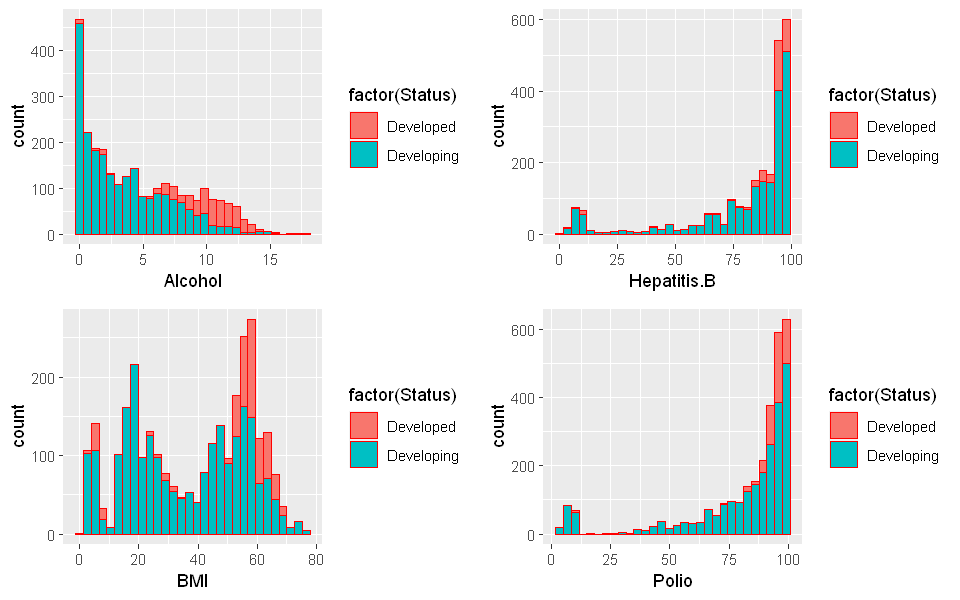

In [11]:
attach(df_life)
# for subplots
install.packages("ggpubr")
library(ggpubr)
# scaling the plot
options(repr.plot.width = 8, repr.plot.height = 5, warn = - 1)
alcohol <- ggplot(data = df_life, aes(x = Alcohol, fill = factor(Status))) + 
        geom_histogram(color = "red")

H.B <- ggplot(data = df_life, aes(x = Hepatitis.B, fill = factor(Status))) + 
        geom_histogram(color = "red")

bmi_plot <- ggplot(data = df_life, aes(x = BMI, fill = factor(Status))) + 
        geom_histogram(color = "red")

Polio_plot <- ggplot(data = df_life, aes(x = Polio, fill = factor(Status))) + 
        geom_histogram(color = "red")

# arranging it together
ggarrange(alcohol, H.B, bmi_plot, Polio_plot,
          ncol = 2, nrow = 2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


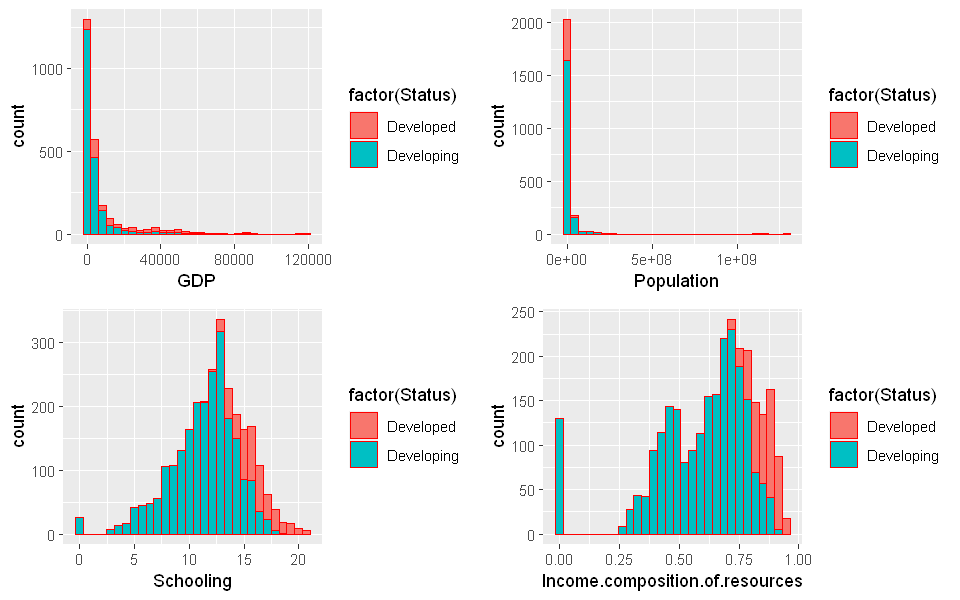

In [12]:
options(repr.plot.width = 8, repr.plot.height = 5, warn=-1)
gdp_plot <- ggplot(data = df_life, aes(x = GDP, fill = factor(Status))) + 
        geom_histogram(color = "red")

pop_plot <- ggplot(data = df_life, aes(x = Population, fill = factor(Status))) + 
        geom_histogram(color = "red")

schooling_plot <- ggplot(data = df_life, aes(x = Schooling, fill = factor(Status))) + 
        geom_histogram(color = "red")

income_plot <- ggplot(data = df_life, aes(x = Income.composition.of.resources, fill = factor(Status))) + 
        geom_histogram(color = "red")

ggarrange(gdp_plot,  pop_plot, schooling_plot, income_plot,
          ncol = 2, nrow = 2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


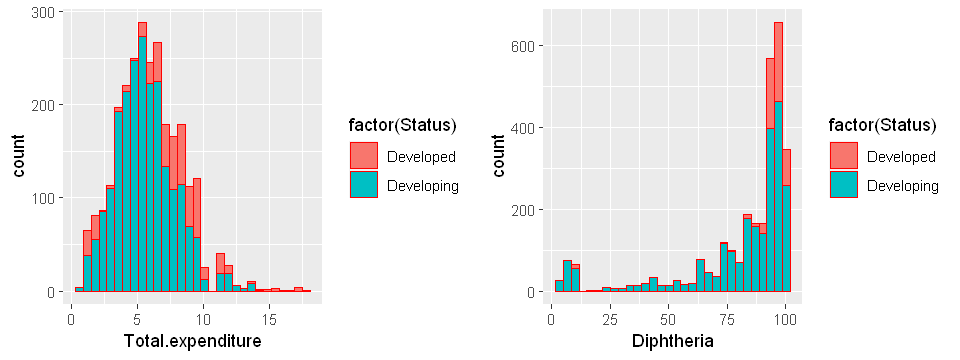

In [13]:
options(repr.plot.width = 8, repr.plot.height = 3, warn=-1)
te_plot <- ggplot(data = df_life, aes(x = Total.expenditure, fill = factor(Status))) + 
        geom_histogram(color = "red")

diptheria_plot <- ggplot(data = df_life, aes(x = Diphtheria, fill = factor(Status))) + 
        geom_histogram(color = "red")

ggarrange(te_plot,  diptheria_plot,
          ncol = 2, nrow = 1)

Analysis:

Looking at the the histograms, most of them are normally distributed or Positively skewed we can conclude that filling the values with mean will be most appropriate when compared to median as most of the distribution is skewed.

##### Imputation

In [14]:
# for missing value imputation
install.packages("mice")
library(mice)

package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Divit\AppData\Local\Temp\RtmpmWsPnx\downloaded_packages



Attaching package: 'mice'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    cbind, rbind



In [15]:
df_life_numeric = df_life[,c(4:22)]
df_life_impute = mice(df_life_numeric, method = "mean", seed = 1)
df_life_numeric_impute = complete(df_life_impute)


 iter imp variable
  1   1  Alcohol  Hepatitis.B  BMI  Polio  Total.expenditure  Diphtheria  GDP  Population  thinness..10.19.years  thinness.5.9.years  Income.composition.of.resources  Schooling
  1   2  Alcohol  Hepatitis.B  BMI  Polio  Total.expenditure  Diphtheria  GDP  Population  thinness..10.19.years  thinness.5.9.years  Income.composition.of.resources  Schooling
  1   3  Alcohol  Hepatitis.B  BMI  Polio  Total.expenditure  Diphtheria  GDP  Population  thinness..10.19.years  thinness.5.9.years  Income.composition.of.resources  Schooling
  1   4  Alcohol  Hepatitis.B  BMI  Polio  Total.expenditure  Diphtheria  GDP  Population  thinness..10.19.years  thinness.5.9.years  Income.composition.of.resources  Schooling
  1   5  Alcohol  Hepatitis.B  BMI  Polio  Total.expenditure  Diphtheria  GDP  Population  thinness..10.19.years  thinness.5.9.years  Income.composition.of.resources  Schooling
  2   1  Alcohol  Hepatitis.B  BMI  Polio  Total.expenditure  Diphtheria  GDP  Population  thin

In [16]:
sum(is.na(df_life_numeric_impute))

[1] 0

In [17]:
dim(df_life_numeric_impute)

[1] 2928   19

### 7.3. Outlier detection

In [18]:
# statistical summary of all continuous variables
summary(df_life_numeric_impute)

 Life.expectancy Adult.Mortality infant.deaths        Alcohol      
 Min.   :36.30   Min.   :  1.0   Min.   :   0.00   Min.   : 0.010  
 1st Qu.:63.10   1st Qu.: 74.0   1st Qu.:   0.00   1st Qu.: 1.107  
 Median :72.10   Median :144.0   Median :   3.00   Median : 4.160  
 Mean   :69.22   Mean   :164.8   Mean   :  30.41   Mean   : 4.615  
 3rd Qu.:75.70   3rd Qu.:228.0   3rd Qu.:  22.00   3rd Qu.: 7.400  
 Max.   :89.00   Max.   :723.0   Max.   :1800.00   Max.   :17.870  
 percentage.expenditure  Hepatitis.B       Measles              BMI       
 Min.   :    0.000      Min.   : 1.00   Min.   :     0.0   Min.   : 1.00  
 1st Qu.:    4.854      1st Qu.:80.96   1st Qu.:     0.0   1st Qu.:19.40  
 Median :   65.611      Median :87.00   Median :    17.0   Median :43.00  
 Mean   :  740.321      Mean   :80.96   Mean   :  2427.9   Mean   :38.24  
 3rd Qu.:  442.614      3rd Qu.:96.00   3rd Qu.:   362.2   3rd Qu.:56.10  
 Max.   :19479.912      Max.   :99.00   Max.   :212183.0   Max.   :77.60  

Inferences: The following variables and the values does not make sense

1. Adult Mortality: Minimum value of 1? This is surely an error in Measurement.
2. GDP: Miminum value of 1.68 USD? This is definitely an outlier.
3. BMI: Minimum of 1 and maximum of 77.60. This seems odd and should be checked thoroughly
3. under.five.deaths: Minimum value of 0 doesn't make sense
4. Population: Population cannot be 34 for an entire country.

Lets visualise this with boxplots of the variables.

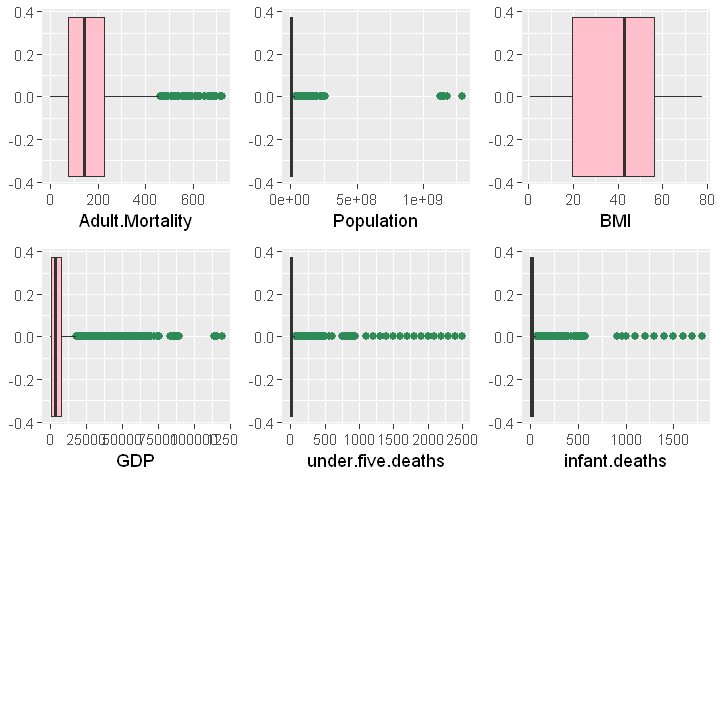

In [19]:
# for subplots
install.packages("ggpubr")
library(ggpubr)

options(repr.plot.width = 6, repr.plot.height = 6, warn=-1)
#BOXPLOTS
AM_box <- ggplot(data = df_life_numeric_impute, aes(x = Adult.Mortality)) + 
        geom_boxplot(outlier.colour="seagreen", outlier.shape=16, outlier.size=2,
                     fill = "pink")

Population_box <- ggplot(data = df_life_numeric_impute, aes(x = Population)) + 
        geom_boxplot(outlier.colour="seagreen", outlier.shape=16, outlier.size=2,
                     fill = "pink")

bmi_boxplot <- ggplot(data = df_life_numeric_impute, aes(x = BMI)) + 
        geom_boxplot(outlier.colour="seagreen", outlier.shape=16, outlier.size=2,
                     fill = "pink")

gdp_boxplot <- ggplot(data = df_life_numeric_impute, aes(x = GDP)) + 
        geom_boxplot(outlier.colour="seagreen", outlier.shape=16, outlier.size=2,
                     fill = "pink")

under5death_boxplot <- ggplot(data = df_life_numeric_impute, aes(x = under.five.deaths)) + 
        geom_boxplot(outlier.colour="seagreen", outlier.shape=16, outlier.size=2,
                     fill = "pink")

infant_boxplot <- ggplot(data = df_life_numeric_impute, aes(x = infant.deaths)) + 
        geom_boxplot(outlier.colour="seagreen", outlier.shape=16, outlier.size=2,
                     fill = "pink")

# arranging it together
ggarrange(AM_box, Population_box, bmi_boxplot, gdp_boxplot, under5death_boxplot, infant_boxplot,
          ncol = 3, nrow = 3)

After seeing the boxplots, We can see that there are are quite a few outliers in the variables. So, lets take the percentage of outliers in every column using the following function

In [20]:
outlier_count <- function(coln, i = 0){
    print(paste0('........', colnames(df_life_numeric_impute)[i], '.........'))
    q25 = quantile(coln, probs = c(0.25))
    q75 = quantile(coln, probs = c(0.75))
    IQR = q75-q25
    min_val = q25 - (IQR*1.5)
    max_val = q75 + (IQR*1.5)
    outlier_count = 0
    for (x in coln){
        
        if ((x<min_val) | (x>max_val)){
           outlier_count = outlier_count+1
        }
    }
    outlier_percent = (outlier_count/2928)*100
    print(paste(c("Number of outliers:", outlier_count)))
    print(paste(c("Percent of data that is outlier:", outlier_percent)))
}

In [21]:
for (i in 1:ncol(df_life_numeric_impute)){
    outlier_count(df_life_numeric_impute[, i], i = i)
}

[1] "........Life.expectancy........."
[1] "Number of outliers:" "10"                 
[1] "Percent of data that is outlier:" "0.341530054644809"               
[1] "........Adult.Mortality........."
[1] "Number of outliers:" "82"                 
[1] "Percent of data that is outlier:" "2.80054644808743"                
[1] "........infant.deaths........."
[1] "Number of outliers:" "315"                
[1] "Percent of data that is outlier:" "10.7581967213115"                
[1] "........Alcohol........."
[1] "Number of outliers:" "3"                  
[1] "Percent of data that is outlier:" "0.102459016393443"               
[1] "........percentage.expenditure........."
[1] "Number of outliers:" "388"                
[1] "Percent of data that is outlier:" "13.2513661202186"                
[1] "........Hepatitis.B........."
[1] "Number of outliers:" "314"                
[1] "Percent of data that is outlier:" "10.724043715847"                 
[1] "........Measles........."
[1] "Numbe

Winsorization should be carried out carried out: By winsorization I mean to find the max and min for a column for example. That value should be replaced by the second highest or second lowest value in the same column, without loosing the rest of the details in the observation.

In [22]:
# winsorization of the outliers which lie under 2 % off the numerical columns dataset
install.packages("psych")
library(psych)


outlier_removal_numeric = winsor(df_life_numeric_impute, trim = 0.02)
df_outlier_removal_numeric = as.data.frame(outlier_removal_numeric)

dim(df_outlier_removal_numeric)

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Divit\AppData\Local\Temp\RtmpmWsPnx\downloaded_packages



Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



[1] 2928   19

In [23]:
df_life_cleaned = cbind(df_life[,c(1:3)], df_outlier_removal_numeric)

In [24]:
# checking for null values
colSums(is.na(df_life_cleaned))

Country                            Year 
                              0                               0 
                         Status                 Life.expectancy 
                              0                               0 
                Adult.Mortality                   infant.deaths 
                              0                               0 
                        Alcohol          percentage.expenditure 
                              0                               0 
                    Hepatitis.B                         Measles 
                              0                               0 
                            BMI               under.five.deaths 
                              0                               0 
                          Polio               Total.expenditure 
                              0                               0 
                     Diphtheria                        HIV.AIDS 
                              0                               0 
                            GDP                      Population 
                              0                               0 
          thinness..10.19.years              thinness.5.9.years 
                              0                               0 
Income.composition.of.resources                       Schooling 
                              0                               0

### 7.4. Correlation Plot

In [26]:
correlation = cor(df_life_cleaned[,-c(1,2,3)])

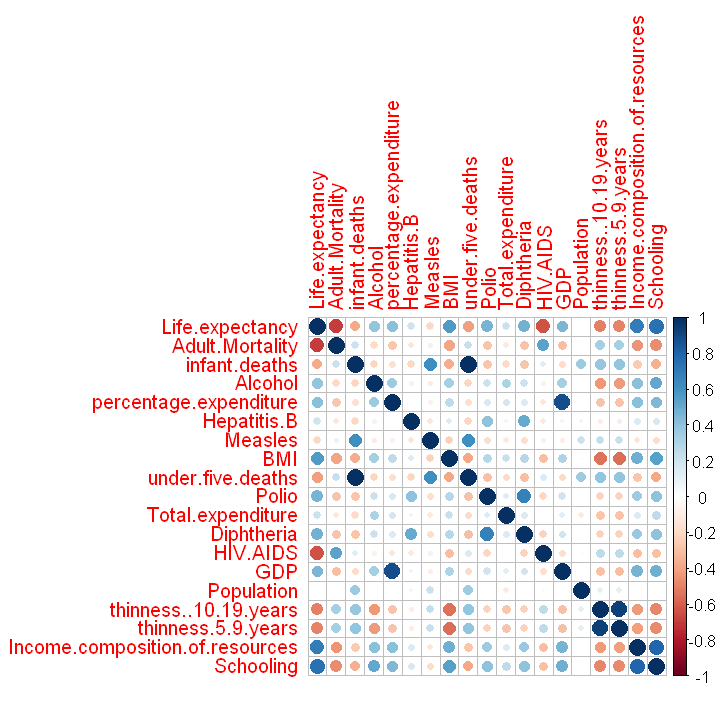

In [27]:
par(mfrow=c(1,1))
corrplot(correlation)

Analysis: Since (under.5.deaths and infant.deaths), (GDP and percentage expenditure), (schooling and income.composition.of resources), (thinness..10.19.years and thinnes.5.9.years), (Polio and Diptheria) are highly correlated, we can drop one of the variable from the four sets.

In [28]:
# dropping infant.deaths, percentage.expenditure, Schooling, Diptheria, thinnes   columns as they are least correlated to 
df_life_cleaned_final = select(df_life_cleaned, -c("infant.deaths", "percentage.expenditure",
                                                   "Schooling", "Diphtheria",
                                                   "thinness..10.19.years"))
colnames(df_life_cleaned_final) 

[1] "Country"                         "Year"                           
 [3] "Status"                          "Life.expectancy"                
 [5] "Adult.Mortality"                 "Alcohol"                        
 [7] "Hepatitis.B"                     "Measles"                        
 [9] "BMI"                             "under.five.deaths"              
[11] "Polio"                           "Total.expenditure"              
[13] "HIV.AIDS"                        "GDP"                            
[15] "Population"                      "thinness.5.9.years"             
[17] "Income.composition.of.resources"

In [29]:
dim(df_life_cleaned_final)

[1] 2928   17

In [30]:
head(df_life_cleaned_final)

Country,Year,Status,Life.expectancy,Adult.Mortality,Alcohol,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,HIV.AIDS,GDP,Population,thinness.5.9.years,Income.composition.of.resources
Afghanistan,2015,Developing,65.0,263,0.01,65,1154,19.1,83,7,8.16,0.1,584.25921,33736494,17.300,0.479
Afghanistan,2014,Developing,59.9,271,0.01,62,492,18.6,86,58,8.18,0.1,612.69651,327582,17.500,0.476
Afghanistan,2013,Developing,59.9,268,0.01,64,430,18.1,89,62,8.13,0.1,631.74498,31731688,17.700,0.470
Afghanistan,2012,Developing,59.5,272,0.01,67,2787,17.6,93,67,8.52,0.1,669.95900,3696958,18.000,0.463
Afghanistan,2011,Developing,59.2,275,0.01,68,3013,17.2,97,68,7.87,0.1,63.53723,2978599,18.200,0.454
Afghanistan,2010,Developing,58.8,279,0.01,66,1989,16.7,102,66,9.20,0.1,553.32894,2883167,18.246,0.448


### 7.5. Exploration/Insights from the data

#### 7.5.1. Individual countries contribution to the dataset

This is important to know if the countries are being overrepresented. From the below table, we can conclude that individual countries are equally represented in the dataset. And the life expectancy will not matter based on the country rather the status of the country will be significant.

In [31]:
myframe = as.data.frame(table(df_life_cleaned_final$Country))
head(myframe)

Var1,Freq
Afghanistan,16
Albania,16
Algeria,16
Angola,16
Antigua and Barbuda,16
Argentina,16


In [32]:
# To check countries that are lower than 16
myframe[which(myframe$Freq<16),]

,Var1,Freq
40,Cook Islands,0
50,Dominica,0
106,Marshall Islands,0
111,Monaco,0
118,Nauru,0
125,Niue,0
129,Palau,0
143,Saint Kitts and Nevis,0
147,San Marino,0
179,Tuvalu,0


#### 7.5.2. Contribution of evey year to the dataset

This is to check whether any year is overepresented or not. All the year's contribution has been the same from the below graph

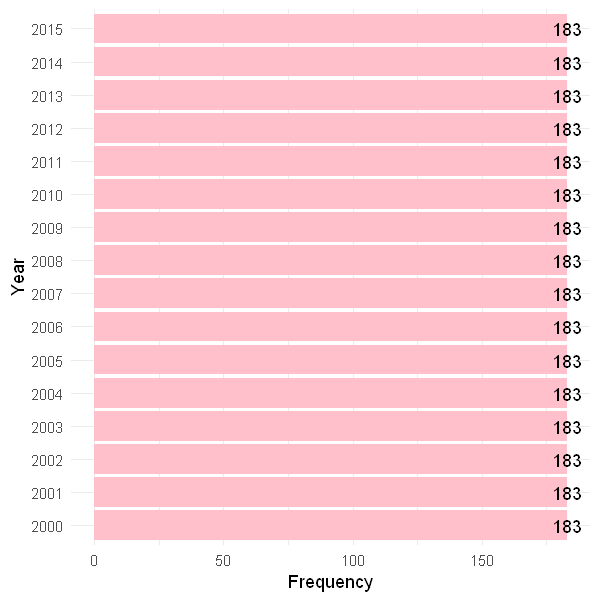

In [33]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(as.data.frame(table(df_life_cleaned_final$Year)), aes(Var1, Freq, label = Freq)) + 
  geom_bar(stat="identity", fill = "pink")+ coord_flip()+ geom_text()+labs(x = "Year", y = "Frequency") +theme_minimal()

#### 7.5.3. Contribution of unique values in Status (Categorical variable)

This is to check whether one of the unique values are overepresents the dataset.

From the below graph, developing countries are over-represented so the model created from this dataset will be biased towards developing countries. The status plays a significant role in determining the life expectancy. Hence, one hot encoding should be implemented on this variable in the next section

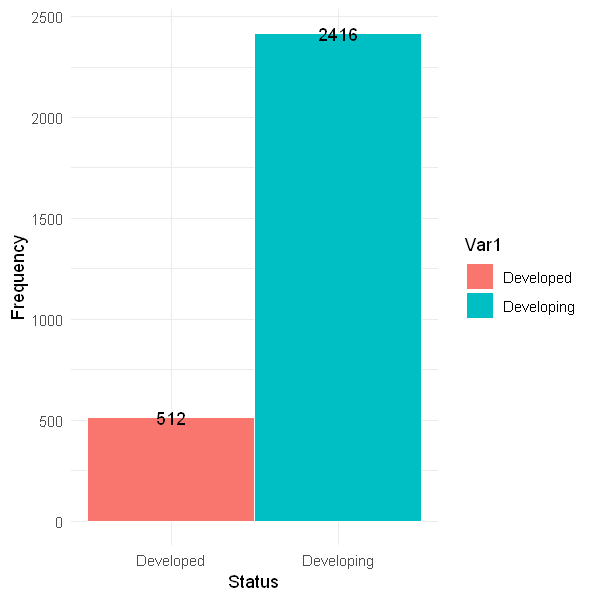

In [34]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(as.data.frame(table(df_life_cleaned_final$Status)), 
       aes(Var1, Freq, label = Freq, fill = Var1)) + 
  geom_bar(stat="identity", width=1,, color = "white") +
    geom_text() + theme_minimal() + labs(x = "Status", y = "Frequency")

#### 7.5.4. Year to life Expectancy comparison

First we see the changes in the life expectancy w.r.t years: 

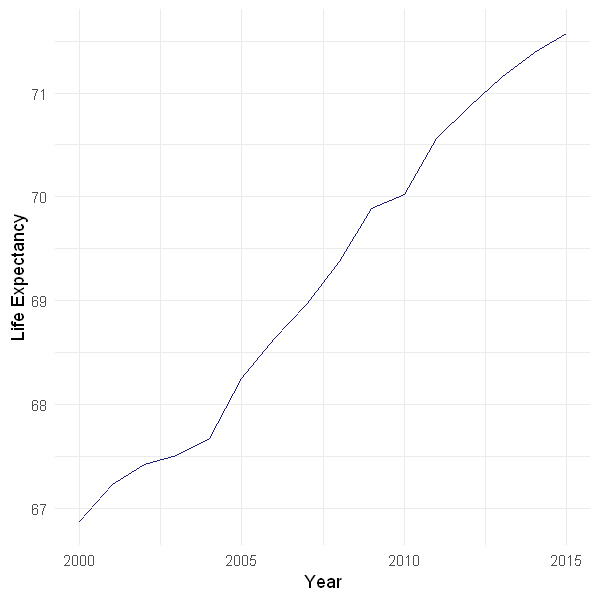

In [35]:
new_df = df_life_cleaned_final %>% 
select(Year, Life.expectancy) %>% 
group_by(Year) %>% 
summarise(avg=mean(Life.expectancy))

options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(data = new_df, aes(x = Year, y = avg)) + 
  geom_line( color = "midnightblue") + theme_minimal() +
    labs(x = "Year", y = "Life Expectancy")

Analysis: We conclude that it increases with the years (i.e. a positive trend), but is 15 years of data enough to make the year relevant to a model. We will also check the correlation and carry out a ttest to find out.

In [36]:
cor(df_life_cleaned_final$Year, df_life_cleaned_final$Life.expectancy)

[1] 0.1666183

The correlation does not seem to be significant. Now carry out a t-test.

In [37]:
years_unique = unique(df_life_cleaned_final$Year)
sort.int(years_unique)

[1] 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
[16] 2015

In [38]:
# Creating the dataframe to carry out the t-test
yearly_le = data.frame(matrix(nrow = 183))   #since there 183 observations in each year
for (i in sort.int(years_unique)){
    new <- rep(i, nrow(yearly_le))     # Create new column
    yearly_le[ , ncol(yearly_le) + 1] <- 
    df_life_cleaned_final[which(df_life_cleaned_final$Year == i), 4]# Append new column
    colnames(yearly_le)[ncol(yearly_le)] <- paste0(i) # renaming the column names
}
yearly_le = yearly_le[,-c(1)]
head(yearly_le)

2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
54.800,55.300,56.200,56.700,57.000,57.3,57.3,57.5,58.1,58.6,58.8,59.2,59.5,59.9,59.9,65.0
72.600,73.600,73.300,72.800,73.000,73.5,74.2,75.9,75.3,76.1,76.2,76.6,76.9,77.2,77.5,77.8
71.300,71.400,71.600,71.700,72.300,72.9,73.4,73.8,74.1,74.4,74.7,74.9,75.1,75.3,75.4,75.6
47.262,47.262,47.262,47.262,47.262,47.4,47.7,48.2,48.7,49.1,49.6,51.0,56.0,51.1,51.7,52.4
73.600,73.800,74.000,74.200,74.400,74.6,74.8,75.0,75.2,75.4,75.6,75.7,75.9,76.1,76.2,76.4
74.100,74.000,74.100,74.100,74.700,74.9,75.2,74.8,75.4,75.6,75.5,75.7,75.9,76.0,76.2,76.3


In [39]:
# an un-paired 2 sample t-test between life expactancies of two years

for (i in sort.int(years_unique)[-16]){
    print(paste0("----------",i," to ",i+1, "-----------"))
    a = as.character(i)
    b = as.character(i+1)
    p_val = t.test(x = yearly_le[,a], y = yearly_le[,b], alternative = "two.sided",
                   var.equal = FALSE)$p.value
    print(paste0("p-value: ", p_val))
}

[1] "----------2000 to 2001-----------"
[1] "p-value: 0.735135247803541"
[1] "----------2001 to 2002-----------"
[1] "p-value: 0.854083936702605"
[1] "----------2002 to 2003-----------"
[1] "p-value: 0.93199161922903"
[1] "----------2003 to 2004-----------"
[1] "p-value: 0.874084653327749"
[1] "----------2004 to 2005-----------"
[1] "p-value: 0.567099276764165"
[1] "----------2005 to 2006-----------"
[1] "p-value: 0.704627016053249"
[1] "----------2006 to 2007-----------"
[1] "p-value: 0.738521320368458"
[1] "----------2007 to 2008-----------"
[1] "p-value: 0.669201053038091"
[1] "----------2008 to 2009-----------"
[1] "p-value: 0.591025499554946"
[1] "----------2009 to 2010-----------"
[1] "p-value: 0.883704161753653"
[1] "----------2010 to 2011-----------"
[1] "p-value: 0.560483742640351"
[1] "----------2011 to 2012-----------"
[1] "p-value: 0.734036062031863"
[1] "----------2012 to 2013-----------"
[1] "p-value: 0.748470924956317"
[1] "----------2013 to 2014-----------"
[1] "p-value

Looking at the p-value of the t-test, it is evident that differences between life expectancy of two consecutive years is not significant. Hence, we can discard the years column. This will be carried out in the next Section.

## 8. Feature Enginering

Checking BMI column as that seems the most absured based on it's values. Anything higher than 50 and lower than 10 doesn't make sense. Therefore, let's check how many of the observations lies in this region.

In [40]:
len_BMI_absured = length(
    df_outlier_removal_numeric[which((df_outlier_removal_numeric$BMI>50)
                                        |(df_outlier_removal_numeric$BMI<10)),
                                                    "Life.expectancy"])

#percentage of absurd values in BMI
proportion_of_absured_values = (len_BMI_absured/(dim(df_outlier_removal_numeric)[1]))*100
print(paste0("Percentage of absurd value: ", proportion_of_absured_values))

[1] "Percentage of absurd value: 48.292349726776"


These absured values are almost 50% of the observations in column. Hence, we should drop the entire column as this gives no relevant information.

We will drop Country, Year and BMI columns as they have no sognificance impact on changes in the Life Expectancy

In [41]:
df_life_final_temp = df_life_cleaned_final %>% select(, -c(1,2, "BMI"))

Status,Life.expectancy,Adult.Mortality,Alcohol,Hepatitis.B,Measles,under.five.deaths,Polio,Total.expenditure,HIV.AIDS,GDP,Population,thinness.5.9.years,Income.composition.of.resources
Developing,65.0,263,0.01,65,1154,83,7,8.16,0.1,584.25921,33736494,17.300,0.479
Developing,59.9,271,0.01,62,492,86,58,8.18,0.1,612.69651,327582,17.500,0.476
Developing,59.9,268,0.01,64,430,89,62,8.13,0.1,631.74498,31731688,17.700,0.470
Developing,59.5,272,0.01,67,2787,93,67,8.52,0.1,669.95900,3696958,18.000,0.463
Developing,59.2,275,0.01,68,3013,97,68,7.87,0.1,63.53723,2978599,18.200,0.454
Developing,58.8,279,0.01,66,1989,102,66,9.20,0.1,553.32894,2883167,18.246,0.448


In [42]:
dim(df_life_final_temp)

[1] 2928   14

### 8.1. One Hot Encoding (Status Variable)

Now, Let's carry out One-hot encoding of the Status (Categorical Variable)

In [43]:
# for creating dummy variables

install.packages("fastDummies")
library(fastDummies)

dummy_cols = dummy_cols(df_life_final_temp, select_columns = 'Status')
print(dim(dummy_cols))
head(dummy_cols)

package 'fastDummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Divit\AppData\Local\Temp\RtmpmWsPnx\downloaded_packages
[1] 2928   16


Status,Life.expectancy,Adult.Mortality,Alcohol,Hepatitis.B,Measles,under.five.deaths,Polio,Total.expenditure,HIV.AIDS,GDP,Population,thinness.5.9.years,Income.composition.of.resources,Status_Developed,Status_Developing
Developing,65.0,263,0.01,65,1154,83,7,8.16,0.1,584.25921,33736494,17.300,0.479,0,1
Developing,59.9,271,0.01,62,492,86,58,8.18,0.1,612.69651,327582,17.500,0.476,0,1
Developing,59.9,268,0.01,64,430,89,62,8.13,0.1,631.74498,31731688,17.700,0.470,0,1
Developing,59.5,272,0.01,67,2787,93,67,8.52,0.1,669.95900,3696958,18.000,0.463,0,1
Developing,59.2,275,0.01,68,3013,97,68,7.87,0.1,63.53723,2978599,18.200,0.454,0,1
Developing,58.8,279,0.01,66,1989,102,66,9.20,0.1,553.32894,2883167,18.246,0.448,0,1


### 8.2. Standardisation

The different features in this dataset has varied ranges and they need to be brought down to a similar range for better model comparison. This can be done by Standardising.

Standardising a dataset means to scale all the numeric variables with mean = 0 and standard_deviation = 1.

Note: Only Independent variables are scaled and not the dependent variable.

In [44]:
# we will drop original Status column as well as Status_developing column
#to maintain the degree of freedom i.e. Status_developed clearly describes 
#the developed countries with class 0
df_life_temp = dummy_cols[,-c(1,16)]

# standardisation using scale() function
scaled_numeric_features = scale(df_life_temp[,-c(1,14)])

Dataset used for Feature Selection

In [45]:
df_life_final = cbind(df_life_temp[,"Life.expectancy"], scaled_numeric_features,
                      df_life_temp[,"Status_Developed"])

# renaming columns
colnames(df_life_final)[1] = "Life.expectancy"
colnames(df_life_final)[14] = "Status_Developed"

print(dim(df_life_final))
head(df_life_final)


[1] 2928   14


Life.expectancy,Adult.Mortality,Alcohol,Hepatitis.B,Measles,under.five.deaths,Polio,Total.expenditure,HIV.AIDS,GDP,Population,thinness.5.9.years,Income.composition.of.resources,Status_Developed
65.0,0.8481664,-1.186077,-0.7149357,-0.09714342,0.7997361,-3.2519205,0.9953407,-0.3909853,-0.5736896,1.5392199,2.988299,-0.7235845,0
59.9,0.9159883,-1.186077,-0.8489479,-0.22150794,0.8454349,-1.0575363,1.0041517,-0.3909853,-0.5712076,-0.5889257,3.036135,-0.7382381,0
59.9,0.8905551,-1.186077,-0.7596064,-0.23315537,0.8911336,-0.8854277,0.9821243,-0.3909853,-0.5695450,1.4115139,3.083971,-0.7675454,0
59.5,0.9244661,-1.186077,-0.6255942,0.20963493,0.9520653,-0.6702920,1.1539377,-0.3909853,-0.5662097,-0.3742967,3.155726,-0.8017371,0
59.2,0.9498993,-1.186077,-0.5809234,0.25209170,1.0129970,-0.6272649,0.8675820,-0.3909853,-0.6191382,-0.4200561,3.203562,-0.8456980,0
58.8,0.9838103,-1.186077,-0.6702649,0.05972120,1.0891616,-0.7133191,1.4535098,-0.3909853,-0.5763892,-0.4261351,3.214564,-0.8750053,0


### 8.3. Feature Selection (Recursive Feature elimination)

Recursive feature elimination is one of the wrapper methods of feature selection which uses a machine learning algorithm to find the best features. Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.

We will first split the data into Feature and Target array before doing Recursive feature elimination.

In [44]:
# Creative Feature (X_RFE) and target array (y_RFE)
X_RFE = df_life_final[,-1]
y_RFE = df_life_final[,1]

We will use rfe() function from CARET package to implement Recursive Feature elimination.

Syntax: ref(x, y, sizes = , rfecontrol =)

where:

1. x = dataframe or matrix of features
2. y = target variable
3. sizes = number of features that needs to be selected
4. rfeControl : list of control options such as algorithm, cross validation etc.

First, we define a control variable which consist of control options and then perform rfe using rfe()  

In [45]:
# specifying the CV technique as well as the random forest algorithm
#which will be passed into the rfe() function in feature selection
control_rfe = rfeControl(functions = rfFuncs, # random forest
                         method = "cv",       # repeated cv
                         number = 10)         # number of folds
set.seed(50)
# Performing RFE
result_rfe = rfe(x = X_RFE, 
                 y = y_RFE, 
                 sizes = c(5:10),
                 rfeControl = control_rfe)

# summarising the results
result_rfe


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables  RMSE Rsquared   MAE RMSESD RsquaredSD   MAESD Selected
         5 2.080   0.9526 1.483 0.1600   0.006081 0.09936         
         6 1.714   0.9666 1.094 0.1573   0.005247 0.07270         
         7 1.638   0.9696 1.034 0.1756   0.005846 0.09786        *
         8 1.674   0.9685 1.073 0.1378   0.004202 0.06656         
         9 1.639   0.9696 1.042 0.1509   0.004539 0.07573         
        10 1.642   0.9697 1.056 0.1279   0.003944 0.06602         
        13 1.662   0.9690 1.074 0.1331   0.003991 0.07284         

The top 5 variables (out of 7):
   HIV.AIDS, Income.composition.of.resources, Total.expenditure, Adult.Mortality, Alcohol


In [46]:
# all the features selected by rfe
predictors(result_rfe)

[1] "HIV.AIDS"                        "Income.composition.of.resources"
[3] "Total.expenditure"               "Adult.Mortality"                
[5] "Alcohol"                         "thinness.5.9.years"             
[7] "under.five.deaths"

After carrying ouut EDA which included recursive feature elimination as a feature selection technique, the features that impact the life expectancy the most are:

1. HIV.AIDS
2. Income.composition.of.resources
3. Adult.Mortality
4. Total.expenditure
5. Alcohol
6. thinness.5.9.years
7. under.five.deaths

Hence, we will use these features to create a model.

In [46]:
df_life_expect = df_life_final[,c("Life.expectancy", 'HIV.AIDS', 
                                  'Income.composition.of.resources',
                                  'Adult.Mortality', 'Total.expenditure', 'Alcohol', 
                                  'thinness.5.9.years', 'under.five.deaths')]
print(dim(df_life_expect))
head(df_life_expect)

[1] 2928    8


Life.expectancy,HIV.AIDS,Income.composition.of.resources,Adult.Mortality,Total.expenditure,Alcohol,thinness.5.9.years,under.five.deaths
65.0,-0.3909853,-0.7235845,0.8481664,0.9953407,-1.186077,2.988299,0.7997361
59.9,-0.3909853,-0.7382381,0.9159883,1.0041517,-1.186077,3.036135,0.8454349
59.9,-0.3909853,-0.7675454,0.8905551,0.9821243,-1.186077,3.083971,0.8911336
59.5,-0.3909853,-0.8017371,0.9244661,1.1539377,-1.186077,3.155726,0.9520653
59.2,-0.3909853,-0.8456980,0.9498993,0.8675820,-1.186077,3.203562,1.0129970
58.8,-0.3909853,-0.8750053,0.9838103,1.4535098,-1.186077,3.214564,1.0891616


## 9. Modelling

We will create the following three Regression models and compare the RMSE and R Squared value:
1. Multiple linear Regression
2. Random forest
3. Support Vector Regression

Performance Metrics to be used for slection of best model:
1. Root Mean Squared Error
2. R_Squared value

Steps to be followed:

1. Train-Test split
2. Model Creation - Training and Testing with performance metrics
    1. Linear Regression
    2. Random Forest
    3. Support Vector Regression



### 9.1. Train-Test split

In [47]:
df_life_expect = as.data.frame(df_life_expect)

set.seed(10)
# createDataPartition() function from the caret package to split the original dataset
#into a training and testing set and split data into training (80%) and testing set (20%)
parts = createDataPartition(df_life_expect$Life.expectancy, p = .7, list = F)
train = df_life_expect[parts, ]
test = df_life_expect[-parts, ]


In [48]:
#Train data
X_train = train[,-1]
y_train = train[,1]


print(dim(X_train))
head(X_train)
print(head(y_train))

[1] 2051    7


,HIV.AIDS,Income.composition.of.resources,Adult.Mortality,Total.expenditure,Alcohol,thinness.5.9.years,under.five.deaths
1,-0.3909853,-0.7235845,0.8481664,0.9953407,-1.186077,2.988299,0.7997361
3,-0.3909853,-0.7675454,0.8905551,0.9821243,-1.186077,3.083971,0.8911336
4,-0.3909853,-0.8017371,0.9244661,1.1539377,-1.186077,3.155726,0.9520653
5,-0.3909853,-0.8456980,0.9498993,0.8675820,-1.186077,3.203562,1.0129970
7,-0.3909853,-0.9433889,1.0007658,1.5504302,-1.186077,3.214564,1.1500933
8,-0.3909853,-0.9482734,1.0516322,1.0702337,-1.180903,3.214564,1.2110250


[1] 65.0 59.9 59.5 59.2 58.6 58.1


In [49]:
# Test Data
X_test = test[,-1]
y_test = test[,1]

print(dim(X_test))
head(X_test)
print(head(y_test))

[1] 877   7


,HIV.AIDS,Income.composition.of.resources,Adult.Mortality,Total.expenditure,Alcohol,thinness.5.9.years,under.five.deaths
2,-0.3909853,-0.7382381,0.9159883,1.00415167,-1.18607717,3.0361354,0.8454349
6,-0.3909853,-0.8750053,0.9838103,1.45350980,-1.18607717,3.2145640,1.0891616
15,-0.3909853,-1.4025358,1.2974868,0.83674374,-1.18607717,-0.5754886,1.3938200
22,-0.3909853,0.4780128,-0.6100053,-0.24700235,0.17728347,-0.7907509,-0.4493635
25,-0.3909853,0.3705529,-1.3051802,0.08781351,0.25489413,-0.7429149,-0.4493635
28,-0.3909853,0.2630930,-1.2373583,0.21116673,-0.01415616,-0.6950788,-0.4493635


[1] 59.9 58.8 55.3 76.2 75.9 73.0


### 9.2. Model Creation - Training and Testing

#### 9.2.1. Multiple linear regression

##### Training

Using train function in Caret:

Syntax: train(formula, data = , method = , trControl = , tuneGrid = )

Where:

1. y is the independent variable and 
2. x are the dependent variables
3. method = Type of the model to be built ("lm" for Linear regression)

In [50]:

set.seed(10)
model_lm = train(x = X_train, 
                 y= y_train, 
                 method = "lm")


#getModelInfo("lm", regex = TRUE)[[1]]$param
model_lm

Linear Regression 

2051 samples
   7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 2051, 2051, 2051, 2051, 2051, 2051, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  4.38615  0.7759866  3.236878

Tuning parameter 'intercept' was held constant at a value of TRUE

In [51]:
# train results
train_results_lm = model_lm$results[c(2,3)]
train_results_lm

RMSE,Rsquared
4.38615,0.7759866


##### Testing

In [52]:
#Using predict function to predict the dependent variable using X_test
y_pred_lm = predict(model_lm, X_test)

In [53]:
# RMSE
test_RMSE = rmse(y_test,y_pred_lm)

# R2
RSQUARE = function(y_actual,y_predict){
  cor(y_actual,y_predict)^2
}

r2_test_lm =  RSQUARE(y_test,y_pred_lm)

test_results_lm = data.frame("test_RMSE" = test_RMSE,
                               "test_Rsquared" = r2_test_lm)
summary_lm = cbind((data.frame("Model" = "Linear Regression")), 
                   train_results_lm, test_results_lm)
summary_lm

Model,RMSE,Rsquared,test_RMSE,test_Rsquared
Linear Regression,4.38615,0.7759866,4.081337,0.8033405


#### 9.2.2. Optimised Regression Tree (CART)

Decision Tree is a supervised machine learning algorithm which can be used to perform both classification and regression on complex datasets. They are also known as Classification and Regression Trees (CART). Hence, it works for both continuous and categorical variables.

Important basic tree Terminology is as follows:

Root node: represents an entire popuplation or dataset which gets divided into two or more pure sets (also known as homogeneuos steps). It always contains a single input variable (x).
Leaf or terminal node: These nodes do not split further and contains the output variable

##### Training

We will use caret package to perform Cross Validation and Hyperparameter tuning (max_depth) using grid search technique. First, we will use the trainControl() function to define the method of cross validation to be carried out and search type i.e. "grid". Then train the model using train() function.

Syntax: train(formula, data = , method = , trControl = , tuneGrid = )

Where:

1. y is the independent variable and 
2. x are the dependent variables
3. method = Type of the model to be built ("rpart2" for CART)
4. trControl = Takes the control parameters. We will use trainControl function out here where we will specify the Cross validation technique and the search technique for hyperparater tuning.
5. tuneGrid = takes the tuning parameters and applies grid search CV on them

In [54]:
# specifying the CV technique which will be passed into the train() function later 
# and number parameter is the "k" in K-fold cross validation
train_control = trainControl(method = "cv", number = 5, search = "grid")

## Customsing the tuning grid (ridge regression has alpha = 0)
Regress_Tree_Grid =  expand.grid(maxdepth = c(1,3,5,7))

set.seed(10)

# training a Regression model while tuning parameters (Method = "rpart2")
model_regress = train(x = X_train, y = y_train, method = "rpart2", 
                      trControl = train_control, tuneGrid = Regress_Tree_Grid)

# summarising the results
model_regress

CART 

2051 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1642, 1640, 1641, 1641, 1640 
Resampling results across tuning parameters:

  maxdepth  RMSE      Rsquared   MAE     
  1         6.011746  0.5891819  4.676836
  3         4.669063  0.7515647  3.413410
  5         4.150874  0.8032454  3.040356
  7         3.853521  0.8301712  2.890316

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was maxdepth = 7.

The best model chosen was with max_depth of 7 and the results are shown below.

In [55]:
# train results
train_results_regress = model_regress$results[4,c(2,3)]
train_results_regress

,RMSE,Rsquared
4,3.853521,0.8301712


##### Testing

In [56]:
#Using predict function to predict the dependent variable using X_test
y_pred_regress = predict(model_regress, X_test)

In [57]:
# RMSE
test_RMSE_regress = rmse(y_test,y_pred_regress)

# R2
RSQUARE = function(y_actual,y_predict){
  cor(y_actual,y_predict)^2
}

r2_test_regress =  RSQUARE(y_test,y_pred_regress)

test_results_regress = data.frame("test_RMSE" = test_RMSE_regress,
                               "test_Rsquared" = r2_test_regress)
summary_regress = cbind(
    (data.frame("Model" = "Optimised Regression Tree (max_depth = 7)")),
                        train_results_regress, test_results_regress)
summary_regress

,Model,RMSE,Rsquared,test_RMSE,test_Rsquared
4,Optimised Regression Tree (max_depth = 7),3.853521,0.8301712,3.658193,0.8425765


#### 9.2.3. Extreme Gradient Boosting

XGBoost uses ensemble model which is based on Decision tree. A simple decision tree is considered to be a weak learner. The algorithm build sequential decision trees were each tree corrects the error occuring in the previous one until a condition is met.

Recently, researchers and enthusiasts have started using ensemble techniques like XGBoost to win data science competitions and hackathons. It outperforms algorithms such as Random Forest and Gadient Boosting in terms of speed as well as accuracy when performed on structured data.

##### Training

We will use caret package to perform Cross Validation and Hyperparameter tuning (nround- Number of trees and max_depth) using grid search technique. First, we will use the trainControl() function to define the method of cross validation to be carried out and search type i.e. "grid" or "random". Then train the model using train() function with tuneGrid as one of the arguements.

Syntax: train(formula, data = , method = , trControl = , tuneGrid = )

Where:

1. y is the independent variable and 
2. x are the dependent variables
3. method = Type of the model to be built ("xgbTree"- for gradient boosting)
4. trControl = Takes the control parameters. We will use trainControl function out here where we will specify the Cross validation technique.
5. tuneGrid = takes the tuning parameters and applies grid search CV on them

In [58]:
# specifying the CV technique which will be passed into the train() function later 
#and number parameter is the "k" in K-fold cross validation
train_control = trainControl(method = "cv", number = 5, search = "grid")

options(warn=-1)
set.seed(50)
# Customsing the tuning grid
gbmGrid <-  expand.grid(max_depth = c(3, 5, 7), 
                        nrounds = (5:10)*50,    # number of trees
                        # default values below
                        eta = 0.3,
                        gamma = 0,
                        subsample = 1,
                        min_child_weight = 1,
                        colsample_bytree = 0.6)

# training a XGboost Regression tree model while tuning parameters
model_xgb = train(x = X_train, y = y_train, method = "xgbTree", 
                  trControl = train_control, tuneGrid = gbmGrid)

# summarising the results
model_xgb

[19:02:21] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:22] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:24] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:25] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:26] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:27] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:29] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:30] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg

eXtreme Gradient Boosting 

2051 samples
   7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1641, 1641, 1641, 1640, 1641 
Resampling results across tuning parameters:

  max_depth  nrounds  RMSE      Rsquared   MAE     
  3          250      1.991735  0.9548413  1.368531
  3          300      1.977955  0.9554620  1.356074
  3          350      1.970812  0.9557750  1.348425
  3          400      1.967698  0.9559214  1.346158
  3          450      1.962451  0.9561535  1.342683
  3          500      1.964937  0.9560344  1.341683
  5          250      1.815232  0.9624208  1.235457
  5          300      1.814645  0.9624456  1.234861
  5          350      1.813466  0.9624956  1.233527
  5          400      1.812695  0.9625309  1.232901
  5          450      1.812859  0.9625252  1.232949
  5          500      1.813245  0.9625102  1.233251
  7          250      1.859893  0.9605017  1.260735
  7          300      1.859772  0.9605067  1.260321
  7   

The best model chosen has max_depth of 4 and nrounds of 400. The results are shown below.

In [59]:
# train results
train_results_xgb = model_xgb$results[10,c(8,9)]
train_results_xgb

,RMSE,Rsquared
4,1.967698,0.9559214


##### Testing

In [61]:
#Using predict function to predict the dependent variable using X_test
y_pred_xgb = predict(model_xgb, X_test)
# RMSE
test_RMSE_xgb = rmse(y_test,y_pred_xgb)
# R2
RSQUARE = function(y_actual,y_predict){
  cor(y_actual,y_predict)^2
}

r2_test_xgb =  RSQUARE(y_test,y_pred_xgb)

test_results_xgb = data.frame("test_RMSE" = test_RMSE_xgb,
                               "test_Rsquared" = r2_test_xgb)
summary_xgb = cbind((
    data.frame("Model" = "Extreme Gradient Boosting(max_depth = 5,nrounds = 400)")),
                    train_results_xgb, test_results_xgb)
summary_xgb

,Model,RMSE,Rsquared,test_RMSE,test_Rsquared
4,"Extreme Gradient Boosting(max_depth = 5,nrounds = 400)",1.967698,0.9559214,1.808698,0.9614178


## 10. Results and Model Selection

The summary of all the performance metrics claculated after training and testing with three different model is mentioned below. They were created using with the following features:

1. HIV.AIDS
2. Income.composition.of.resources
3. Adult.Mortality
4. Total.expenditure
5. Alcohol
6. thinness.5.9.years
7. under.five.deaths

In [62]:
#combining the result of all the models
summary_all = rbind(summary_lm, summary_regress, summary_xgb)
summary_all

,Model,RMSE,Rsquared,test_RMSE,test_Rsquared
1,Linear Regression,4.386150,0.7759866,4.081337,0.8033405
4,Optimised Regression Tree (max_depth = 7),3.853521,0.8301712,3.658193,0.8425765
41,"Extreme Gradient Boosting(max_depth = 5,nrounds = 400)",1.967698,0.9559214,1.808698,0.9614178


From the above results, **Extreme Gradient Boosting model (max_depth = 5 and number of iterations = 400)** gives the best result of **RMSE = 1.80 and R Squared value = 0.961** in the testing phase. These values are quite low and it shows that the predictions made on unseen data will be accurate.

Next we will save the model.

There are two ways to save and load the model:

1. using save(), load(): When we use save(), we will have to load it using the same name.
2. using saveRDS(), loadRDS(): saveRDS() does not save the model name and we have the flexibilty to load the model in any other name. Bur saveRDS() can only save one object at a time as it is lower-level function. Most people prefer saveRDS() over save() as it serialises the object.

Syntax: saveRDS(model, file =)

where:
1. model = model that you want to save
2. file = path with the file extension .rda

In [66]:
# saving the model
saveRDS(model_xgb, file = "model_xgboost.rda")

## 11. Conclusion

After carrying out Exploratory data analysis and feature engineering, the best features chosen for predictive modelling were 7 out of 22:'HIV.AIDS', 'Income.composition.of.resources', 'Adult.Mortality', 'Total.expenditure', 'Alcohol', 'thinness.5.9.years', 'under.five.deaths'. After modelling and comparing the three models by using performance metrics such as RMSE and R squared, we can conclude tha the best model was Extrme Gradient boosting model with depth of 5. It had testing RMSE to be 1.80 and testing R_squared to be 0.96 which is excellent.